In [3]:
from fly_hash import * 
import matplotlib.pyplot as plt

In [4]:
data = preprocess(load_mnist())
# d: dimension of vector, k: hash length, p: probability of 1 in fly hash matrix
n, d = data.shape[0], data.shape[1]
query_size = 1000
p = 0.02

ks = np.array([2, 4, 8, 12, 16, 20, 24, 28, 32, 40])
k_num = ks.shape[0]

gaussian = np.zeros(k_num)
fly = np.zeros(k_num)
fly_expansion = np.zeros(k_num)
fly_WTA = np.zeros(k_num)
fly_binary = np.zeros(k_num)

times = 10

for i in range(k_num):
    for t in range(times):
        k = ks[i]
        queries = np.random.choice(n, query_size, False)
        gaussian_matrix = createGaussianMatrix(k, d)
        fly_matrix = createFlyMatrix(k, d, p)
        fly_matrix_expansion = createFlyMatrix(20*k, d, p)
        
        gaussian[i] += mAP(data, queries, gaussian_matrix)
        fly[i] += mAP(data, queries, fly_matrix)
        fly_expansion[i] += mAP(data, queries, fly_matrix_expansion, expansion=True, k=k)
        fly_WTA[i] += mAP(data, queries, fly_matrix_expansion, expansion=True, k=k, WTA=True)
        fly_binary[i] += mAP(data, queries, fly_matrix_expansion, expansion=True, k=k, WTA=True, binary=True)
        
    gaussian[i] /= times
    fly[i] /= times
    fly_expansion[i] /= times
    fly_WTA[i] /= times
    fly_binary[i] /= times
    
#     print('k = ', k)
#     print('gaussian : ', gaussian[i])
#     print('fly : ', fly[i])
#     print('fly_expansion : ', fly_expansion[i])
#     print('fly_WTA : ', fly_WTA[i])
#     print('fly_binary : ', fly_binary[i])

In [5]:
with open('result.txt', 'w') as f:
    f.write('k gaussian fly fly_expansion fly_WTA fly_binary\n')
    for i in range(k_num):
        f.write('{} {} {} {} {} {}\n'.format(
            ks[i], gaussian[i], fly[i], fly_expansion[i], fly_WTA[i], fly_binary[i]))

In [6]:
# with open('result.txt', 'r') as f:
#     tmp = f.read().split('\n')
#     ks = np.array([2, 4, 8, 12, 16, 20, 24, 28, 32, 40])
#     k_num = ks.shape[0]

#     gaussian = np.zeros(k_num)
#     fly = np.zeros(k_num)
#     fly_expansion = np.zeros(k_num)
#     fly_WTA = np.zeros(k_num)
#     fly_binary = np.zeros(k_num)
#     for i in np.arange(len(tmp)):
#         if i == 0 or i == len(tmp)-1:
#             continue
#         t = tmp[i].split(' ')
#         gaussian[i-1] = float(t[1])
#         fly[i-1] = float(t[2])
#         fly_expansion[i-1] = float(t[3])
#         fly_WTA[i-1] = float(t[4])
#         fly_binary[i-1] = float(t[5])

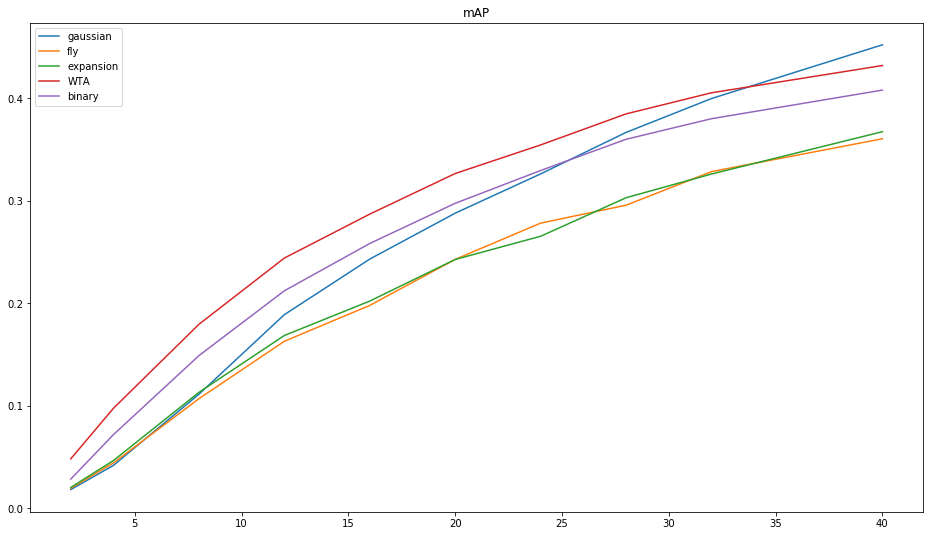

In [ ]:
%matplotlib inline

plt.figure(figsize=(16,9)) 
plt.title('mAP')

gaussian_plot, = plt.plot(ks, gaussian, label='gaussian')

fly_plot, = plt.plot(ks, fly, label='fly')

expansion_plot, = plt.plot(ks, fly_expansion, label='expansion')

WTA_plot, = plt.plot(ks, fly_WTA, label='WTA')

binary_plot, = plt.plot(ks, fly_binary, label='binary')

plt.legend(handles=[gaussian_plot, fly_plot, expansion_plot, WTA_plot, binary_plot])

plt.savefig('result1.png')

In [ ]:
data = preprocess(load_mnist())
# d: dimension of vector, k: hash length, p: probability of 1 in fly hash matrix
n, d = data.shape[0], data.shape[1]
query_size = 1000
p = 0.02

ks = np.array([2, 4, 8, 12, 16, 20, 24, 28, 32, 40])
k_num = ks.shape[0]

gaussian = np.zeros(k_num)
fly = np.zeros(k_num)

times = 10

for i in range(k_num):
    for t in range(times):
        k = ks[i]
        queries = np.random.choice(n, query_size, False)
        gaussian_matrix = createGaussianMatrix(k, d)
        fly_matrix = createFlyMatrix(10*d, d, p)
        
        gaussian[i] += mAP(data, queries, gaussian_matrix)
        fly[i] += mAP(data, queries, fly_matrix, expansion=True, k = k, WTA=True)
        
    gaussian[i] /= times
    fly[i] /= times
    
    print('k = ', k)
    print('gaussian : ', gaussian[i])
    print('fly : ', fly[i])

k =  2
gaussian :  0.0151212989169
fly :  0.0711594955804
k =  4
gaussian :  0.0437262321774
fly :  0.110182791459


In [ ]:
with open('result2.txt', 'w') as f:
    f.write('k gaussian fly\n')
    for i in range(k_num):
        f.write('{} {}\n'.format(
            ks[i], gaussian[i], fly[i]))

In [ ]:
%matplotlib inline

index = np.arange(k_num)

bar_width = 0.35

gaussian_bar = plt.bar(index, gaussian, width = bar_width, label='gaussian',tick_label = ks, fc = 'y')

fly_bar = plt.bar(index+bar_width, fly, width = bar_width, label='fly',fc = 'r')  

plt.legend()

plt.savefig('result2.png')